In [ ]:
"""
Import DecisionTreeClassifier from sklearn.tree.

Instantiate a DecisionTreeClassifier dt of maximum depth equal to 6.

Fit dt to the training set.

Predict the test set labels and assign the result to y_pred
"""

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

df=pd.read_csv('../datasets/breast_cancer.csv')
y=df['diagnosis'].apply(lambda x: 1 if x=='M' else 0)
print(df.iloc[:,1])
X=df[['radius_mean','concave points_mean']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [13]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
SEED=1
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 1 1 0 0]


In [ ]:
"""
Import the function accuracy_score from sklearn.metrics.

Predict the test set labels and assign the obtained array to y_pred.

Evaluate the test set accuracy score of dt by calling accuracy_score() and assign the value to acc.
"""

In [14]:
# Import accuracy_score
from sklearn.metrics import accuracy_score
# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_pred, y_test)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


In [ ]:
"""
Import LogisticRegression from sklearn.linear_model.
Instantiate a LogisticRegression model and assign it to logreg.
Fit logreg to the training set.
Review the plot generated by plot_labeled_decision_regions().
"""

In [25]:
import mlxtend.plotting
import numpy as np
import matplotlib.pyplot as plt
def plot_labeled_decision_regions(X_test, y_test, clfs):
    
    for clf in clfs:

        mlxtend.plotting.plot_decision_regions(np.array(X_test), np.array(y_test), clf=clf, legend=2)
        
        plt.ylim((0,0.2))

        # Adding axes annotations
        plt.xlabel(X_test.columns[0])
        plt.ylabel(X_test.columns[1])
        plt.title(str(clf).split('(')[0])
        plt.show()

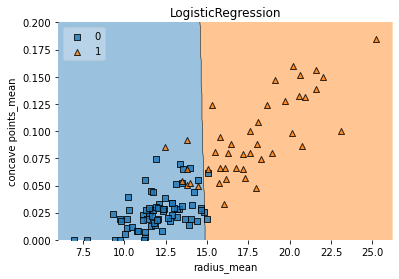

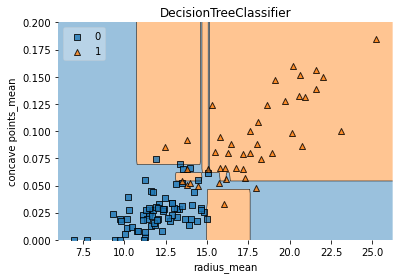

In [26]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

In [ ]:
#Classification tree Learning


In [ ]:
"""
Import DecisionTreeClassifier from sklearn.tree.
Instantiate a DecisionTreeClassifier dt_entropy with a maximum depth of 8.
Set the information criterion to 'entropy'.
"""

In [35]:
X=df.iloc[:, 2:-2]
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry

In [36]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [ ]:
"""
Import accuracy_score from sklearn.metrics.
Predict the test set labels of dt_entropy and assign the result to y_pred.
Evaluate the test set accuracy of dt_entropy and assign the result to accuracy_entropy.
Review accuracy_entropy and accuracy_gini.
"""

In [37]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score( y_pred, y_test)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.9385964912280702


NameError: name 'accuracy_gini' is not defined

In [ ]:
#Decision tree for regression

In [ ]:
"""
Import DecisionTreeRegressor from sklearn.tree.
Instantiate a DecisionTreeRegressor dt with maximum depth 8 and min_samples_leaf set to 0.13.
Fit dt to the training set.
"""

In [38]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [ ]:
"""
Import the function mean_squared_error as MSE from sklearn.metrics.
Predict the test set labels and assign the output to y_pred.
Compute the test set MSE by calling MSE and assign the result to mse_dt.
Compute the test set RMSE and assign it to rmse_dt.
"""

In [39]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as mse
import numpy as np
# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = mse(y_pred, y_test)

# Compute rmse_dt
rmse_dt = np.sqrt(mse_dt)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 0.25


In [ ]:
"""
Predict test set labels using the linear regression model (lr) and assign the result to y_pred_lr.

Compute the test set MSE and assign the result to mse_lr.

Compute the test set RMSE and assign the result to rmse_lr.
"""

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_test, y_test)

LinearRegression()

In [45]:
import numpy as np
# Predict test set labels 
y_pred_lr =lr.predict(X_test)

# Compute mse_lr
mse_lr = mse(y_pred_lr, y_test)

# Compute rmse_lr
rmse_lr = np.sqrt(mse_lr)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 0.20
Regression Tree test set RMSE: 0.25


In [ ]:
"""Q: As the complexity of f^ increases, the bias term decreases while the variance term increases."""

In [ ]:
"""
Import train_test_split from sklearn.model_selection.
Split the data into 70% train and 30% test.
Instantiate a DecisionTreeRegressor with max depth 4 and min_samples_leaf set to 0.26.

"""

In [46]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

In [ ]:
"""
Compute dt's 10-fold cross-validated MSE by setting the scoring argument to 'neg_mean_squared_error'.

Compute RMSE from the obtained MSE scores.
"""

In [48]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt,X_train , y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(0.5)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 0.24


In [ ]:
"""
Import mean_squared_error as MSE from sklearn.metrics.
Fit dt to the training set.
Predict dt's training set labels and assign the result to y_pred_train.
Evaluate dt's training set RMSE and assign it to RMSE_train.
"""

In [49]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(0.5)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 0.23


In [ ]:
"""Q:dt suffers from high bias because RMSE_CV ≈ RMSE_train and both scores are greater than baseline_RMSE."""

In [ ]:
"""
Instantiate a Logistic Regression classifier and assign it to lr.

Instantiate a KNN classifier that considers 27 nearest neighbors and assign it to knn.

Instantiate a Decision Tree Classifier with the parameter min_samples_leaf set to 0.13 and assign it to dt.
"""

In [52]:
from sklearn.neighbors import KNeighborsClassifier 
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNeighborsClassifier(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [ ]:
"""
Iterate over the tuples in classifiers. Use clf_name and clf as the for loop variables:
Fit clf to the training set.
Predict clf's test set labels and assign the results to y_pred.
Evaluate the test set accuracy of clf and print the result.

"""

In [53]:
from sklearn.metrics import accuracy_score
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.924
K Nearest Neighbours : 0.912
Classification Tree : 0.854


In [ ]:
"""
Import VotingClassifier from sklearn.ensemble.
Instantiate a VotingClassifier by setting the parameter estimators to classifiers and assign it to vc.
Fit vc to the training set.
Evaluate vc's test set accuracy using the test set predictions y_pred
"""

In [54]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_pred, y_test)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.901


In [ ]:
#Bagging

In [ ]:
"""
Import DecisionTreeClassifier from sklearn.tree and BaggingClassifier from sklearn.ensemble.

Instantiate a DecisionTreeClassifier called dt.

Instantiate a BaggingClassifier called bc consisting of 50 trees.
"""

In [55]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

In [ ]:
"""
Fit bc to the training set.

Predict the test set labels and assign the result to y_pred.

Determine bc's test set accuracy."""

In [56]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_pred, y_test)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.96


In [ ]:
"""Out of Bag Evaluation """

In [ ]:
"""
Import BaggingClassifier from sklearn.ensemble.

Instantiate a DecisionTreeClassifier with min_samples_leaf set to 8.

Instantiate a BaggingClassifier consisting of 50 trees and set oob_score to True.
"""

In [57]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

In [ ]:
"""
Fit bc to the training set and predict the test set labels and assign the results to y_pred.

Evaluate the test set accuracy acc_test by calling accuracy_score.

Evaluate bc's OOB accuracy acc_oob by extracting the attribute oob_score_ from bc.
"""

In [58]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_pred, y_test)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.906, OOB accuracy: 0.955


In [ ]:
"""Random Forests (RF)"""

In [ ]:
"""
Import RandomForestRegressor from sklearn.ensemble.

Instantiate a RandomForestRegressor called rf consisting of 25 trees.

Fit rf to the training set.
"""

In [59]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

In [ ]:
"""
Import mean_squared_error from sklearn.metrics as MSE.
Predict the test set labels and assign the result to y_pred.
Compute the test set RMSE and assign it to rmse_test.
"""

In [60]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test =np.sqrt(MSE(y_test,y_pred))

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.22


In [ ]:
"""
Call the .sort_values() method on importances and assign the result to importances_sorted.

Call the .plot() method on importances_sorted and set the arguments:

kind to 'barh'
color to 'lightgreen'
"""

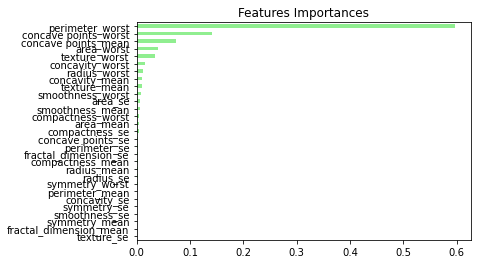

In [61]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [ ]:
#Adaboost

In [ ]:
"""
Import AdaBoostClassifier from sklearn.ensemble.

Instantiate a DecisionTreeClassifier with max_depth set to 2.

Instantiate an AdaBoostClassifier consisting of 180 trees and setting the base_estimator to dt."""

In [62]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

In [ ]:
"""
Fit ada to the training set.

Evaluate the probabilities of obtaining the positive class in the test set.
"""

In [63]:
# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

In [ ]:
"""
Import roc_auc_score from sklearn.metrics.

Compute ada's test set ROC AUC score, assign it to ada_roc_auc, and print it out.
"""

In [64]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.99


In [ ]:
#Gradient Boosting (GB)

In [ ]:
"""
Import GradientBoostingRegressor from sklearn.ensemble.

Instantiate a gradient boosting regressor by setting the parameters:

max_depth to 4

n_estimators to 200"""

In [65]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

In [ ]:
"""Fit gb to the training set.
Predict the test set labels and assign the result to y_pred."""

In [66]:
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

In [ ]:
"""
Import mean_squared_error from sklearn.metrics as MSE.

Compute the test set MSE and assign it to mse_test.

Compute the test set RMSE and assign it to rmse_test.
"""

In [67]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = np.sqrt(mse_test)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 0.200


In [ ]:
"""
Instantiate a Stochastic Gradient Boosting Regressor (SGBR) and set:

max_depth to 4 and n_estimators to 200,

subsample to 0.9, and

max_features to 0.75."""

In [68]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=2)

In [ ]:
"""
Fit sgbr to the training set.
Predict the test set labels and assign the results to y_pred"""

In [69]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

In [ ]:
"""
Import mean_squared_error as MSE from sklearn.metrics.

Compute test set MSE and assign the result to mse_test.

Compute test set RMSE and assign the result to rmse_test.
"""

In [70]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = np.sqrt(mse_test)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 0.214


In [ ]:
#Tuning a CART's Hyperparameters

In [ ]:
"""Define a grid of hyperparameters corresponding to a Python dictionary called params_dt with:

the key 'max_depth' set to a list of values 2, 3, and 4

the key 'min_samples_leaf' set to a list of values 0.12, 0.14, 0.16, 0.18""""

In [71]:
# Define params_dt
params_dt = {'max_depth':[2,3,4], 'min_samples_leaf':[0.12,0.14,0.16,0.18]}

In [ ]:
"""
Import GridSearchCV from sklearn.model_selection.

Instantiate a GridSearchCV object using 5-fold CV by setting the parameters:

estimator to dt, param_grid to params_dt and

scoring to 'roc_auc'.
"""

In [72]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

In [ ]:
"""
Import roc_auc_score from sklearn.metrics.

Extract the .best_estimator_ attribute from grid_dt and assign it to best_model.

Predict the test set probabilities of obtaining the positive class y_pred_proba.

Compute the test set ROC AUC score test_roc_auc of best_model.
"""

In [73]:
# Import roc_auc_score from sklearn.metrics 
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
#Tuning a RF's Hyperparameters

In [ ]:
"""Define a grid of hyperparameters corresponding to a Python dictionary called params_rf with:

the key 'n_estimators' set to a list of values 100, 350, 500

the key 'max_features' set to a list of values 'log2', 'auto', 'sqrt'

the key 'min_samples_leaf' set to a list of values 2, 10, 30"""

In [74]:
# Define the dictionary 'params_rf'
params_rf = {
    'n_estimators':[100,350,500],
    'max_features':['log2','auto','sqrt'],
    'min_samples_leaf':[2,10,30]
}

In [ ]:
"""
Import GridSearchCV from sklearn.model_selection.

Instantiate a GridSearchCV object using 3-fold CV by using negative mean squared error as the scoring metric."""

In [76]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

In [ ]:
"""
Import mean_squared_error as MSE from sklearn.metrics.

Extract the best estimator from grid_rf and assign it to best_model.

Predict best_model's test set labels and assign the result to y_pred.

Compute best_model's test set RMSE.
"""

In [ ]:
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = np.sqrt( MSE(y_test, y_pred))

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 